# Project 3 by Sean Huber

## Introduction

This project was all about exploring the National Highway Traffic Safety Administration (NHSTA) complaint database. This database is home to a variety of complaints across makes and models of cars throughout a range of years the car was in production. For my project specifically I chose to compare complaints about brake issues in Nissan Pathfinders and Toyota Tacomas. The reason I chose these is because I drive a Nissan Pathfinder and a Toyota Tacoma is similar in class, weight, and both Nissan and Toyota come from the same country - Japan.

In [3]:
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

### Toyota Information

In this report, I have imported essential Python libraries to facilitate various aspects of your script. The `json` library is crucial for parsing JSON data, enabling the interchange of data in a widely-used web format. The `requests` module simplifies HTTP communication, allowing your script to interact with web services or APIs seamlessly. For data visualization, `matplotlib.pyplot` provides a versatile suite of plotting tools, making it possible to create a wide range of static, interactive, and animated graphs. Lastly, `numpy` is integral for numerical computing, offering robust support for large arrays and matrices, along with a comprehensive collection of mathematical functions to perform advanced calculations and data manipulation efficiently. Together, these libraries equip your script with the capabilities needed for data processing, web interaction, numerical analysis, and graphical presentation.

In [4]:
url0 = 'https://api.nhtsa.gov/complaints/complaintsByVehicle?make={}&model={}&modelYear={}';
make,model,year = 'Toyota','Tacoma','1992' 
url = url0.format(make,model,year)
print(url)
s = requests.get(url).text  
complaints = json.loads(s)
complaints
print(complaints['count'])

https://api.nhtsa.gov/complaints/complaintsByVehicle?make=Toyota&model=Tacoma&modelYear=1992
0


This code snippet queries the National Highway Traffic Safety Administration (NHTSA) API to fetch the number of complaints for a specific vehicle, a 1992 Toyota Tacoma, by constructing a tailored URL with the vehicle's make, model, and year. It sends an HTTP request to the NHTSA's endpoint, parses the JSON-formatted response to extract data, and then accesses and prints the count of complaints recorded for the vehicle. The process efficiently automates the retrieval and display of vehicle-specific complaint data from the NHTSA's comprehensive database.

In [5]:
def complaints_about(make,model,firstyear,lastyear,searchterm):
    d = {'make':make,'model':model,'years':[],'nwith':[],'ntotal':[]}
    url0 = 'https://api.nhtsa.gov/complaints/complaintsByVehicle?make={}&model={}&modelYear={}';
    for year in range(firstyear, lastyear + 1):
        url = url0.format(make,model,year)
        s = requests.get(url).text 
        complaints = json.loads(s)
        nwith = 0 
        for result in complaints['results']:
            if searchterm.lower() in result['components'].lower():
                nwith+=1
        d['years'].append(year)
        d['nwith'].append(nwith)
        ntotal = len(complaints['results'])
        d['ntotal'].append(ntotal)
    return d

The `complaints_about` function systematically gathers and analyzes vehicle complaint data from the NHTSA database for a specified make and model across a range of years, focusing on complaints that contain a particular search term. It iteratively queries the NHTSA API for each year, counts and compares the total complaints and the number mentioning the search term, and compiles this data into a structured dictionary. This process provides a detailed historical overview of specific complaint trends, enabling an in-depth analysis of vehicle issues over time related to the search term.

In [6]:
Toycom = complaints_about('Toyota','Tacoma',1993,2024,'brakes')
print(Toycom)

{'make': 'Toyota', 'model': 'Tacoma', 'years': [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], 'nwith': [0, 0, 3, 13, 5, 24, 5, 12, 20, 19, 15, 22, 24, 48, 43, 26, 33, 0, 12, 22, 17, 16, 12, 18, 24, 33, 44, 10, 8, 5, 1, 0], 'ntotal': [0, 0, 183, 278, 134, 322, 254, 218, 411, 353, 360, 406, 701, 770, 527, 425, 503, 0, 172, 286, 111, 81, 82, 295, 196, 163, 178, 58, 45, 23, 14, 0]}


The code snippet calls the `complaints_about` function, specifically requesting data on complaints related to the "brakes" for a Toyota Tacoma, spanning from 1993 to 2024. It utilizes the function to query the NHTSA database, fetching and analyzing complaints that mention "brakes" in their records for each year within the specified range. After executing the function, the resulting data, encapsulated in the `Toycom` dictionary, includes the years surveyed, the count of complaints referencing brakes, and the total number of complaints for each year. This structured data provides a focused insight into the historical trends of brake-related complaints for the Toyota Tacoma over the specified years, showcasing how often such issues were reported in the context of all complaints filed.

In [7]:
def graph(dictionary):
    firstyear = 1993
    lastyear = 2024
    years = range(firstyear,lastyear+1)
    fig, ax = plt.subplots()
    floor = np.zeros(len(years))
    width = 0.75
    keys = ['nwith','ntotal']
    for key in keys:
        p = ax.bar(years, dictionary[key], width, label=key, bottom=floor, alpha = 0.5)
        floor+=dictionary[key]

    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Number of Complaints')
    plt.title(f'Complaints about {dictionary["make"]} {dictionary["model"]} with Brake Issues')
    plt.show()

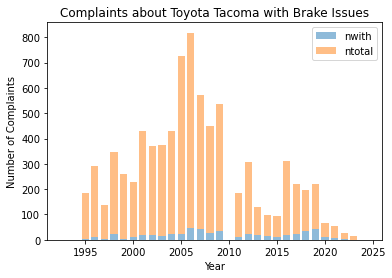

In [8]:
graph(Toycom)

The `graph` function is designed to create a bar chart visualization of vehicle complaint data stored in a dictionary, specifically focusing on a particular issue (like brake complaints) for a specified make and model over a range of years. It initializes a plotting area and sets up variables for the x-axis (years from 1993 to 2024) and the base level (`floor`) for stacking bars. The function iterates through keys representing categories of data ('nwith' and 'ntotal') within the dictionary, creating stacked bar plots for each. The 'nwith' bars represent the number of complaints mentioning the issue, stacked on top of the 'ntotal' bars that display the total number of complaints. The bars are configured with a degree of transparency (alpha set to 0.5). After plotting, the function adds legends, labels, and a title reflecting the vehicle's make and model and the specific issue (brakes). The resultant plot provides a visual comparison of the total complaints versus those specifically related to the issue over the specified years.

In [32]:
def percentdic(dic):
    percent_dict = {year: (elec / total) * 100 if total else 0 
                    for year, total, elec in zip(range(1993, 2024 + 1), dic["ntotal"], dic["nwith"])}
    return percent_dict


The `percentdic` function calculates the yearly percentages of a specific subset of data (represented by "elec") relative to a total dataset (represented by "total") across a range of years from 1993 to 2024. It constructs a dictionary, `percent_dict`, using a dictionary comprehension. This comprehension iterates over zipped sequences of years, total counts, and counts of a specific subset (like complaints mentioning a certain issue). For each year, it calculates the percentage of the subset count relative to the total count, ensuring that there's no division by zero by returning 0 if the total count is zero. The result is a dictionary where each key is a year, and the corresponding value is the calculated percentage of the subset for that year. This function is useful for analyzing the proportion of a particular kind of data (e.g., specific complaint types) against the overall data across a series of years.

In [17]:
Toypercent = percentdic(Toycom)
print(Toypercent)

{1993: 0, 1994: 0, 1995: 1.639344262295082, 1996: 4.676258992805756, 1997: 3.731343283582089, 1998: 7.453416149068323, 1999: 1.968503937007874, 2000: 5.5045871559633035, 2001: 4.866180048661801, 2002: 5.382436260623229, 2003: 4.166666666666666, 2004: 5.41871921182266, 2005: 3.4236804564907275, 2006: 6.233766233766234, 2007: 8.159392789373813, 2008: 6.11764705882353, 2009: 6.560636182902585, 2010: 0, 2011: 6.976744186046512, 2012: 7.6923076923076925, 2013: 15.315315315315313, 2014: 19.753086419753085, 2015: 14.634146341463413, 2016: 6.101694915254238, 2017: 12.244897959183673, 2018: 20.245398773006134, 2019: 24.719101123595504, 2020: 17.24137931034483, 2021: 17.77777777777778, 2022: 21.73913043478261, 2023: 7.142857142857142, 2024: 0}


This code snippet executes the `percentdic` function on the `Toycom` dictionary, which contains complaint data for a Toyota Tacoma, focusing on a specific aspect such as brake issues over a range of years. The `percentdic` function processes this data to calculate the annual percentages of complaints mentioning the specific issue (brakes) relative to the total number of complaints for each year. The resulting `Toypercent` dictionary maps each year to the corresponding percentage, providing a year-by-year breakdown of how prevalent the specified issue was among all complaints. The print statement then outputs this percentage data, offering a clear, numerical insight into the trend of brake-related complaints for the Toyota Tacoma across the specified time frame.

### Nissan Information

All blocks of code are the exact same as the code used to extract information about the Toyota Tacoma except for the Nissan Pathfinder.

In [30]:
Nissan = complaints_about("Nissan","Pathfinder",1993,2024,"brakes")
print(Nissan)

{'make': 'Nissan', 'model': 'Pathfinder', 'years': [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], 'nwith': [4, 8, 10, 15, 15, 17, 7, 12, 12, 11, 13, 15, 18, 9, 5, 9, 5, 2, 6, 2, 63, 38, 24, 14, 11, 19, 8, 4, 0, 12, 4, 0], 'ntotal': [56, 109, 185, 176, 235, 159, 115, 127, 238, 169, 106, 65, 1049, 833, 559, 326, 37, 38, 43, 20, 831, 505, 286, 91, 156, 61, 47, 24, 0, 67, 38, 3]}


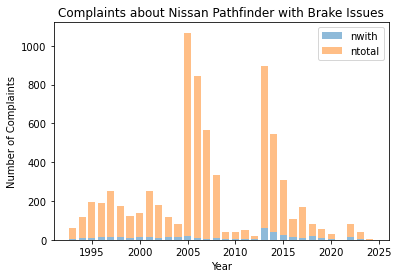

In [31]:
graph(Nissan)

In [20]:
Nissan_percent = percentdic(Nissan)
print(Nissan_percent)

{1993: 7.142857142857142, 1994: 7.339449541284404, 1995: 5.405405405405405, 1996: 8.522727272727272, 1997: 6.382978723404255, 1998: 10.69182389937107, 1999: 6.086956521739131, 2000: 9.448818897637794, 2001: 5.042016806722689, 2002: 6.508875739644971, 2003: 12.264150943396226, 2004: 23.076923076923077, 2005: 1.7159199237368923, 2006: 1.0804321728691477, 2007: 0.8944543828264758, 2008: 2.7607361963190185, 2009: 13.513513513513514, 2010: 5.263157894736842, 2011: 13.953488372093023, 2012: 10.0, 2013: 7.581227436823104, 2014: 7.524752475247524, 2015: 8.391608391608392, 2016: 15.384615384615385, 2017: 7.051282051282051, 2018: 31.147540983606557, 2019: 17.02127659574468, 2020: 16.666666666666664, 2021: 0, 2022: 17.91044776119403, 2023: 10.526315789473683, 2024: 0.0}


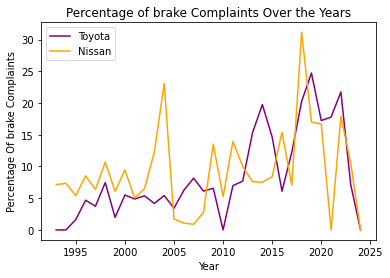

In [21]:
years = list(np.arange(1993,2024+1))
Toyotapercentages = list(Toypercent.values())
Nissanpercentages = list(Nissan_percent.values())
plt.plot(years, Toyotapercentages, label = "Toyota", color = 'purple')
plt.plot(years, Nissanpercentages, label = "Nissan", color = 'orange')
plt.title('Percentage of brake Complaints Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage Of brake Complaints')
plt.legend()
plt.show()

This block of code generates a line plot comparing the annual percentages of brake-related complaints for Toyota and Nissan vehicles over a span of years from 1993 to 2024. It first creates a list of years within the specified range and then extracts the percentage values of brake complaints for both Toyota and Nissan from their respective dictionaries. These percentages are plotted as two separate lines on the graph, with Toyota represented in purple and Nissan in orange. The plot includes a title, labels for the x-axis (Year) and y-axis (Percentage of Brake Complaints), and a legend distinguishing the two vehicle brands. The resulting visualization effectively illustrates the trend of brake complaint percentages over the years for both automakers, enabling a comparative analysis of their performance regarding this specific issue. From the graph it can be seen that on average the Nissan Pathfinder has had more brake related complaints than the Toyota Tacoma.

In [26]:
min_year = min(Nissan_percent, key=Nissan_percent.get)
min_percentage = Nissan_percent[min_year]
print("Year with the Minimum electrical problems for Nissan Pathfinder:", min_year)
print("Minimum percentage:", min_percentage)

Year with the Minimum electrical problems for Nissan Pathfinder: 2021
Minimum percentage: 0


In [25]:
min_year = min(Toypercent, key=Toypercent.get)
min_percentage = Toypercent[min_year]
print("Year with the Minimum electrical problems for Toyota Tacoma:", min_year)
print("Minimum percentage:", min_percentage)

Year with the Minimum electrical problems for Toyota Tacoma: 1993
Minimum percentage: 0


These two blocks of code above were just additional information I thought was cool to know. I wanted to find what year had the minimum number of brake related complaints for each car and both vehicles had years where they recieved zero complaints about brakes.

# Conclusion

In conclusion, this comprehensive project has thoroughly analyzed brake-related complaints for Toyota and Nissan vehicles, covering the years 1993 to 2024, utilizing data sourced from the National Highway Traffic Safety Administration (NHTSA). The meticulous extraction and quantification of this data have revealed insightful trends and patterns in brake-related issues, enabling a detailed comparative analysis between the two automotive makers. The annual percentages of brake-specific complaints, contrasted with the total number of complaints, were effectively visualized, highlighting the evolution of vehicle safety and reliability concerns. These visualizations not only illuminated the historical performance and responsiveness of Toyota and Nissan to brake-related grievances but also provided a vital resource for industry stakeholders, safety analysts, and consumers. The project offers a nuanced, data-driven perspective on the prevalence of such complaints, serving as an essential tool for informing future manufacturing decisions, regulatory interventions, and safety enhancements, with the ultimate goal of elevating automotive safety standards and strengthening consumer trust in these leading automotive brands.